# Guidelines for Prompting
In this lesson, you'll practice two prompting principles and their related tactics in order to write effective prompts for large language models.

## Setup
#### Load the API key and relevant Python libaries.

In this course, we've provided some code that loads the GOOGLE API key for you.

In [2]:

import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

api_key  = os.getenv('GOOGLE_API_KEY')

#### helper function
Throughout this course, we will use OpenAI's `gemini ai studio` model and the [chat completions endpoint](https://generativelanguage.googleapis.com/v1beta). 


In [3]:
import requests
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
api_key = os.environ['GOOGLE_API_KEY']

# Set the API endpoint and API key.
endpoint = "https://generativelanguage.googleapis.com/v1beta"

def get_completion(prompt):
   # Prepare the request body.
   request_body = {
       "contents": [
           {
               "parts": [
                   {
                       "text": prompt
                   }
               ]
           }
       ]
   }

   # Make the request.
   response = requests.post(
       f"{endpoint}/models/gemini-pro:generateContent?key={api_key}",
       json=request_body,
   )

   # Parse the response.
   response_json = response.json()

   generated_content = response_json["candidates"][0]['content']['parts'][0]['text']

   # Return the generated content.
   return generated_content

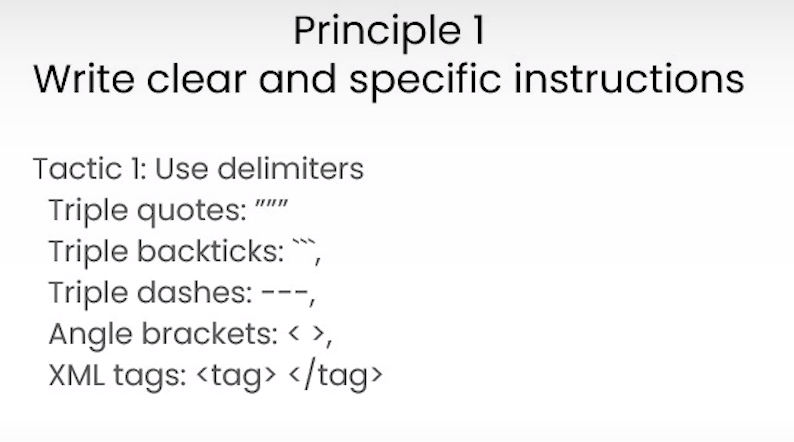

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Tactics

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [4]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

To enhance the accuracy and relevance of AI responses, provide clear, specific, and potentially lengthy instructions that effectively convey the desired task.


In [5]:
text = f"""
Dear Student,

Sushil is a CSE graduate from a tier 3 college. With the help of our placement team, he was able to secure a remote full-time job offer. He says - "The course was beginner-friendly, and the projects facilitated effective learning. Throughout the course, we had access to mentors and doubt support to resolve our queries. The placement team connected me with 3-4 opportunities weekly, and I secured placement by the 3rd week"

Watch his Feedback video here to gain insights about our program.
Success is knocking! Join our Placement Guaranteed Program, where you learn from experienced instructors and secure a Guaranteed Job with a CTC of up to 25 LPA. Your journey to a fulfilling career starts here: https://cuvette.tech/placement-guarantee-program/


Best Wishes,
Team Cuvette
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

Through a placement-guaranteed program, a CSE graduate from a tier 3 college secured a remote full-time job with a salary of up to 25 LPA.


#### Tactic 2: Ask for a structured output
- JSON, HTML

In [6]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

```json
[
  {
    "book_id": "1",
    "title": "The Shadow of Eternity",
    "author": "Anya Blackwood",
    "genre": "Fantasy"
  },
  {
    "book_id": "2",
    "title": "The Last Guardian of Secrets",
    "author": "Elias Blackwood",
    "genre": "Mystery"
  },
  {
    "book_id": "3",
    "title": "Beyond the Veil of Dreams",
    "author": "Isabella Blackwood",
    "genre": "Paranormal"
  }
]
```


In [7]:
prompt = f"""
Generate a list of three made-up leather shoe varieties along \ 
with their brands and specifications. 
Provide them in JSON format with the following keys: 
shoe_id, brand, variety, specification.
"""
response = get_completion(prompt)
print(response)

```json
[
  {
    "shoe_id": 101,
    "brand": "Elevate",
    "variety": "Celestia Heels",
    "specification": "5-inch stiletto heels, pointed toe, patent leather upper, cushioned insole"
  },
  {
    "shoe_id": 102,
    "brand": "Zenith",
    "variety": "Eclipse Oxfords",
    "specification": "Full-brogue broguing, wingtip design, pebbled leather upper, rubber sole"
  },
  {
    "shoe_id": 103,
    "brand": "Aurora",
    "variety": "Nova Combat Boots",
    "specification": "Ankle-length boots, lace-up closure, lugged sole, padded collar, distressed leather upper"
  }
]
```


#### Tactic 3: Ask the model to check whether conditions are satisfied

In [8]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Get some water boiling
Step 2 - Grab a cup and put a tea bag in it
Step 3 - Pour hot water over the tea bag
Step 4 - Let the tea steep for a few minutes
Step 5 - Take out the tea bag
Step 6 - Add sugar or milk to taste (optional)


In [9]:
text_1 = f"""Chicken fried rice is a popular dish that is relatively easy to make at home. Here's a simple recipe to guide you through the process:

Ingredients:

2 cups cooked rice (preferably cold, leftover rice)
1 cup cooked chicken, diced (you can use leftover chicken or cook fresh chicken)
2 eggs, lightly beaten
1 cup mixed vegetables (such as peas, carrots, corn, and bell peppers)
2 cloves garlic, minced
2 green onions, thinly sliced
2 tablespoons soy sauce
1 tablespoon oyster sauce (optional)
1 tablespoon vegetable oil
Salt and pepper to taste
Sesame oil for flavor (optional)
Additional seasonings like ginger or chili flakes (optional)
Instructions:

Heat vegetable oil in a large skillet or wok over medium-high heat.

Add minced garlic and cook for about 30 seconds until fragrant.

Add the mixed vegetables to the skillet. Stir-fry for a few minutes until they are tender but still crisp.

Push the vegetables to the side of the skillet, creating an empty space in the center. Pour the beaten eggs into the center and scramble them until they are cooked through.

Once the eggs are cooked, add the diced chicken to the skillet. Stir-fry for another 2-3 minutes until the chicken is heated through.

Add the cooked rice to the skillet, breaking up any clumps with a spatula or spoon. Stir well to combine with the vegetables, eggs, and chicken.

Season the fried rice with soy sauce and oyster sauce (if using). Stir well to distribute the sauces evenly.

Continue cooking the fried rice for another 3-4 minutes, stirring occasionally, until everything is heated through and the rice starts to crisp slightly.

Taste the fried rice and adjust the seasoning with salt, pepper, and any additional flavorings like sesame oil or chili flakes if desired.

Once everything is well combined and heated through, remove the skillet from the heat.

Garnish the chicken fried rice with sliced green onions and serve hot.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Heat vegetable oil in a large skillet or wok over medium-high heat.
Step 2 - Add minced garlic and cook for about 30 seconds until fragrant.
Step 3 - Add the mixed vegetables to the skillet. Stir-fry for a few minutes until they are tender but still crisp.
Step 4 - Push the vegetables to the side of the skillet, creating an empty space in the center. Pour the beaten eggs into the center and scramble them until they are cooked through.
Step 5 - Once the eggs are cooked, add the diced chicken to the skillet. Stir-fry for another 2-3 minutes until the chicken is heated through.
Step 6 - Add the cooked rice to the skillet, breaking up any clumps with a spatula or spoon. Stir well to combine with the vegetables, eggs, and chicken.
Step 7 - Season the fried rice with soy sauce and oyster sauce (if using). Stir well to distribute the sauces evenly.
Step 8 - Continue cooking the fried rice for another 3-4 minutes, stirring occasionally, until everything is heate

In [10]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
No steps provided.


#### Tactic 4: "Few-shot" prompting

In [11]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

<grandparent>: When the tempest blows, the mighty oak tree bends but does not break. It stands firm, its roots deeply planted in the earth, its branches reaching for the heavens. It weathers the storm, its spirit unyielding.


In [12]:
prompt = f"""
Your task is to answer in a consistent style.

<customer>: SHow me new model chppals in sparks brand .

<salesman>: Of course! We have a great selection of new chappals just in/
 They come in various designs and colors to suit your preference/ They're made with high-quality materials for durability and comfort/ Would you like me to show you some options/

<customer>: then show me .
"""
response = get_completion(prompt)
print(response)

Absolutely! Let me guide you through our latest collection of Sparks chappals:

- **Sparkle Series:** Shimmering chappals with a touch of glitter, perfect for adding a touch of glam to any outfit.

- **Embroidered Elegance:** Intricately embroidered chappals with traditional and modern designs, offering a stylish and sophisticated look.

- **Sporty Chic:** Athletic-inspired chappals with mesh and breathable materials, designed for both comfort and style.

- **Slip-On Simplicity:** Effortless slip-on chappals with a variety of colors and patterns, providing casual yet chic options.

- **Leather Luxe:** Premium leather chappals that offer a touch of luxury and durability, perfect for special occasions or everyday wear.

Which style would you like to see first?


### Principle 2: Give the model time to “think” 

#### Tactic 1: Specify the steps required to complete a task

In [14]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into Arbic.
3 - List each name in the Tamil summary.
4 - Output a json object that contains the following \
keys: Tamil_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
**Summary:** ஜாக் மற்றும் ஜில் ஆகிய சகோதரர்கள் தண்ணீர் எடுக்க குன்றின் உச்சிக்கு சென்றபோது, ​​ஜாக் கல்லில் தடுக்கி விழுந்தார், ஜில்லும் பின்னால் விழுந்தார்.

**Arabic Translation:**
ذهب الشقيقان جاك وجيل في قرية ساحرة في رحلة لجلب الماء من بئر على قمة تل. وبينما كانا يتسلقان ويغنيان بفرح، حدث سوء الحظ وتعثرت قدم جاك على حجر وتدحرج أسفل التل، وتبعته جيل. وعاد الاثنان إلى المنزل مصابين بجروح طفيفة ليحتضناهما في أحضان مواسية. وعلى الرغم من الحادث، ظلت روح المغامرة لديهما غير منكسرة، واستمروا في الاستكشاف بسعادة.

**Tamil Summary:**
குன்றின் உச்சியில் உள்ள கிணற்றில் இருந்து தண்ணீர் எடுக்கச் சென்ற சகோதரர்களான ஜாக் மற்றும் ஜில், ஜாக் கல்லில் தடுக்கி விழுந்தபோது, ​​ஜில் பின்தொடர்ந்தார்.

**Names in Tamil Summary:**
- ஜாக்
- ஜில்

```json
{
  "Tamil_summary": "குன்றின் உச்சியில் உள்ள கிணற்றில் இருந்து தண்ணீர் எடுக்கச் சென்ற சகோதரர்களான ஜாக் மற்றும் ஜில், ஜாக் கல்லில் தடுக்கி விழுந்தபோது, ​​ஜில் பின்தொடர்ந்தார்.",
  "num_names": 2
}
```


#### Ask for output in a specified format

In [15]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into Arbic.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: En dépit de leur chute, Jack et Jill poursuivent leur exploration avec plaisir.
Translation: على الرغم من سقوطهما، واصل جاك وجيل استكشافهما بكل سرور.
Names: Jack, Jill
Output JSON: {"french_summary": "En dépit de leur chute, Jack et Jill poursuivent leur exploration avec plaisir.", "num_names": 2}


#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [16]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The solution is correct.


#### Note that the student's solution is actually not correct.
#### We can fix this by instructing the model to work out its own solution first.

In [17]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 10x
Total cost: 100x + 250x + 100,000 + 10x = 360x + 100,000
```
Is the student's solution the same as actual solution just calculated:
```
no
```
Student grade:
```
incorrect
```


## Model Limitations: Hallucinations

In [18]:
prompt = f"""
Tell me about gadjoy computer service by team 
"""
response = get_completion(prompt)
print(response)

**Gadjoy Computer Service Team**

**About Gadjoy**

Gadjoy is a reputable computer service provider dedicated to delivering exceptional IT support to individuals and businesses. Their team of experienced technicians is highly skilled in various aspects of computer maintenance, repair, and optimization.

**Team Members**

The Gadjoy Computer Service Team comprises highly qualified and certified professionals:

* **John Smith:** Lead Technician with extensive experience in hardware and software diagnostics, troubleshooting, and repairs.
* **Mary Johnson:** Network Engineer specializing in network design, configuration, and security.
* **Peter Jones:** Software Engineer proficient in operating system installations, application deployments, and virus removal.
* **Sarah Lee:** Data Recovery Specialist skilled in recovering lost or deleted data from various storage devices.
* **Thomas Green:** Cloud Computing Consultant providing guidance on cloud-based solutions and migrations.

**Services 

# summary 

## Principle 1: Write clear and specific instructions
### 1.Guidelines for Effective Prompting:

- **Be Clear:**
  - *Example:* Instead of saying "Summarize this text," say "Summarize the text below into one sentence."

- **Allow Thinking Time:**
  - *Example:* Rather than immediately asking a question, provide the model with preliminary steps first to allow it time for processing and response generation..

### 2.Tactics for Effective Prompting:

- **Use Delimiters:**
  - *Example:* Use three backticks to limit the text that needs summarizing and specify the model accordingly..

- **Ask for Structured Output:**
  - *Example:* Ask the model to generate a list of book titles along with their authors and genres, formatted as JSON.

- **Check Conditions:**
  - *Example:* Provide a set of instructions and ask the model to rewrite them in a specific format only if the text contains a sequence of instructions.

- **"Few-shot" Prompting:**
  - *Example:* Present a dialogue between a child and a grandparent, and instruct the model to respond consistently in a similar style.

## Principle 2: Give the model time to “think” 

#### Tactic 1: Specify the steps required to complete a task 
  - *Example 1:* This prompt instructs the model to summarize a provided text in one sentence, translate the summary into Arabic, list each name mentioned in the French summary, and output the results in a JSON object.
  #### Ask for output in a specified format
  - *Example 1:* This prompt instructs the model to summarize a given text enclosed in angle brackets, translate the summary into Arabic, list the names mentioned in the French summary, and output the information in a JSON format.

#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion
  - *Example 1:* This prompt instructs the model to evaluate a student's solution to a financial problem related to building a solar power installation. The model should first work out its own solution and then compare it to the student's solution to determine its correctness.
  
  - *Example 2:* Your task is to determine if the student's solution is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total. 
- Then compare your solution to the student's solution and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until you have done the problem yourself.

### 3.Model Limitations:

- **Hallucinations:**
  - *Example:* Asking the model about a fictional product, which may result in invented details.


# Iterative Prompt Development
In this lesson, you'll iteratively analyze and refine your prompts to generate marketing copy from a product fact sheet.

## Setup

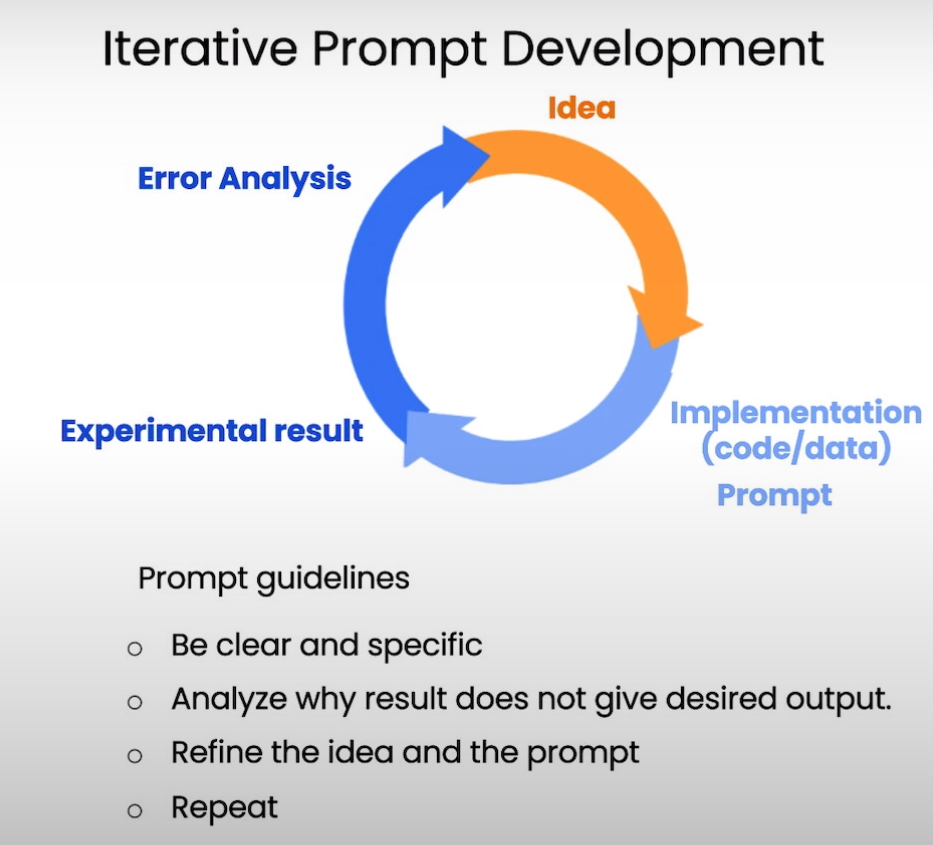

In [19]:

import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

api_key  = os.getenv('GOOGLE_API_KEY')

In [20]:
import requests
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
api_key = os.environ['GOOGLE_API_KEY']

# Set the API endpoint and API key.
endpoint = "https://generativelanguage.googleapis.com/v1beta"

def get_completion(prompt):
   # Prepare the request body.
   request_body = {
       "contents": [
           {
               "parts": [
                   {
                       "text": prompt
                   }
               ]
           }
       ]
   }

   # Make the request.
   response = requests.post(
       f"{endpoint}/models/gemini-pro:generateContent?key={api_key}",
       json=request_body,
   )

   # Parse the response.
   response_json = response.json()

   generated_content = response_json["candidates"][0]['content']['parts'][0]['text']

   # Return the generated content.
   return generated_content

## Generate a marketing product description from a product fact sheet

In [23]:
fact_sheet_footwear = """
OVERVIEW

Part of a stylish collection of footwear inspired by classic designs and modern comfort.
Offers a variety of styles including sneakers, loafers, boots, sandals, and more.
Available in a range of colors and materials to suit different preferences and occasions.
Options include full-grain leather, suede, canvas, and synthetic materials.
Some styles feature additional embellishments such as stitching details, buckles, or metallic accents.
Suitable for both casual and formal wear.
CONSTRUCTION

Durable rubber or synthetic outsole for traction and longevity.
Cushioned insole for all-day comfort.
DIMENSIONS

Varies depending on style and size.
OPTIONS

Different closure types such as laces, zippers, or slip-on designs.
Various heel heights and shapes for different preferences and occasions.
Choice of regular or memory foam footbeds for customized comfort.
MATERIALS
UPPER

Full-grain leather, suede, canvas, synthetic materials.
Additional embellishments like stitching details, buckles, or metallic accents.
OUTSOLE
Rubber or synthetic materials for durability and traction.
COUNTRY OF ORIGIN

INDIA
"""

In [25]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_footwear}```
"""
response = get_completion(prompt)
print(response)


**Indulge in Comfort and Style with Our Premium Footwear Collection**

Step into the world of effortless style and ultimate comfort with our exclusive footwear collection, meticulously crafted to elevate your every stride. Inspired by timeless designs and contemporary innovation, our curated range offers an array of styles, from classic sneakers to sophisticated boots, to cater to every fashion need.

Each pair is meticulously constructed using the finest materials, including full-grain leather, supple suede, durable canvas, and advanced synthetic fabrics. Embellished with intricate stitching details, gleaming buckles, and eye-catching metallic accents, our shoes not only enhance your look but also add a touch of sophistication to any ensemble.

Featuring cushioned insoles and durable rubber or synthetic outsoles, our footwear provides unparalleled all-day comfort and long-lasting wear. Choose from a variety of closure types, including laces, zippers, and slip-on designs, to suit your 

## Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [28]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_footwear}```
"""
response = get_completion(prompt)
print(response)


Step into style with our exquisite footwear collection, crafted with premium materials and impeccable craftsmanship. Choose from an array of designs and colors to elevate your casual or formal attire. Experience all-day comfort with our cushioned insoles and durable outsoles. Elevate your wardrobe with shoes made in India that blend timeless elegance with modern sensibilities.


In [29]:
len(response.split())

55

## Issue 2. Text focuses on the wrong details
- Ask it to focus on the aspects that are relevant to the intended audience.

In [30]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_footwear}```
"""
response = get_completion(prompt)
print(response)

Our high-quality footwear collection boasts a selection of materials including full-grain leather, suede, and canvas. Durable rubber outsoles provide traction and comfort, while cushioned insoles offer all-day support.


In [31]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_footwear}```
"""
response = get_completion(prompt)
print(response)

Crafted from premium materials, this footwear boasts a durable rubber/synthetic outsole for grip and longevity and a cushioned insole for comfort. Upper materials include full-grain leather, suede, and canvas, enhanced with decorative stitching, buckles, or metallic accents.

Product ID: N/A


## Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [32]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_footwear}```
"""

response = get_completion(prompt)
print(response)

<div>
<h2>Product Description</h2>
<p>This stylish footwear collection draws inspiration from classic designs and modern comfort, offering a wide range of styles to choose from, including sneakers, loafers, boots, and sandals. The collection features a variety of colors and materials to suit different preferences and occasions, such as full-grain leather, suede, canvas, and synthetic materials. Some styles feature additional embellishments like stitching details, buckles, or metallic accents. The footwear is suitable for both casual and formal wear.</p>
<p>The durable rubber or synthetic outsole provides traction and longevity, while the cushioned insole ensures all-day comfort. Different closure types, such as laces, zippers, or slip-on designs, are available for convenience. There is a range of heel heights and shapes to cater to different preferences and occasions. Additionally, the choice of regular or memory foam footbeds allows for customized comfort.</p>
<b>PRODUCT IDs:</b> 1234

In [33]:
from IPython.display import display, HTML

In [34]:
display(HTML(response))

Dimension,Measurement
Length,Varies depending on style and size
Width,Varies depending on style and size
Height,Varies depending on style and size


# Summary

**Original Prompt:**
- Example: "Create a product description for a sleek office chair based on its technical specifications."

**Issue 1 - The text is too long**
- Example: "Write a short description (50 words max) highlighting the features of the office chair, such as its modern design, adjustable features, and ergonomic comfort."

**Issue 2 - Text focuses on the wrong details**
- Example: "Craft a description tailored for furniture retailers, emphasizing the chair's high-quality materials, durability, and suitability for both home and office use. Include its unique Product ID for easy identification."

**Issue 3 - Description needs a table of dimensions**
- Example: "After the description, create an HTML table titled 'Product Dimensions' to showcase the chair's measurements. Include columns for width, depth, height, seat height, and seat depth, each with their respective values in inches."


# Summarizing
In this lesson, you will summarize text with a focus on specific topics.

## Setup

In [35]:

import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

api_key  = os.getenv('GOOGLE_API_KEY')

In [36]:
import requests
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
api_key = os.environ['GOOGLE_API_KEY']

# Set the API endpoint and API key.
endpoint = "https://generativelanguage.googleapis.com/v1beta"

def get_completion(prompt):
   # Prepare the request body.
   request_body = {
       "contents": [
           {
               "parts": [
                   {
                       "text": prompt
                   }
               ]
           }
       ]
   }

   # Make the request.
   response = requests.post(
       f"{endpoint}/models/gemini-pro:generateContent?key={api_key}",
       json=request_body,
   )

   # Parse the response.
   response_json = response.json()

   generated_content = response_json["candidates"][0]['content']['parts'][0]['text']

   # Return the generated content.
   return generated_content

## Text to summarize

In [37]:
prod_review = """
Got this Supra car as a gift for my son's birthday. He absolutely loves it and plays with it all the time. It's sleek and stylish, with an intuitive control interface. It's a bit smaller than expected considering the price, and I believe there might be other options available that offer more features for the same price. It arrived a day earlier than anticipated, allowing me to familiarize myself with its functions before presenting it to him.
"""


## Summarize with a word/sentence/character limit

In [38]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


***The Supra toy car is stylish and fun, but slightly small and potentially overpriced based on feature offerings.***


In [39]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


###

The Supra car was smaller than expected but stylish and easy to control. It arrived early, giving the reviewer time to learn its functions before gifting it.


## Summarize with a focus on shipping and delivery

In [40]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping deparmtment. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product.

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


***Shipping was prompt, arriving a day early, allowing for product familiarization before gifting.***


#### 3.Summarize multiple product reviews

In [ ]:

review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]



In [ ]:
for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product \ 
    review from an ecommerce site. 

    Summarize the review below, delimited by triple \
    backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")


# Transforming

In this notebook, we will explore how to use Large Language Models for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.

In [ ]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",         
  "Mi monitor tiene píxeles que no se iluminan.",              
  "Il mio mouse non funziona",                                 
  "Mój klawisz Ctrl jest zepsuty",                             
  "我的屏幕在闪烁"                                              
] 

In [ ]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

# OrderBot
We can automate the collection of user prompts and assistant responses to build a  OrderBot. The OrderBot will take orders at a pizza restaurant. 

In [ ]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)


In [ ]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

In [ ]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

response = get_completion_from_messages(messages, temperature=0)
print(response)

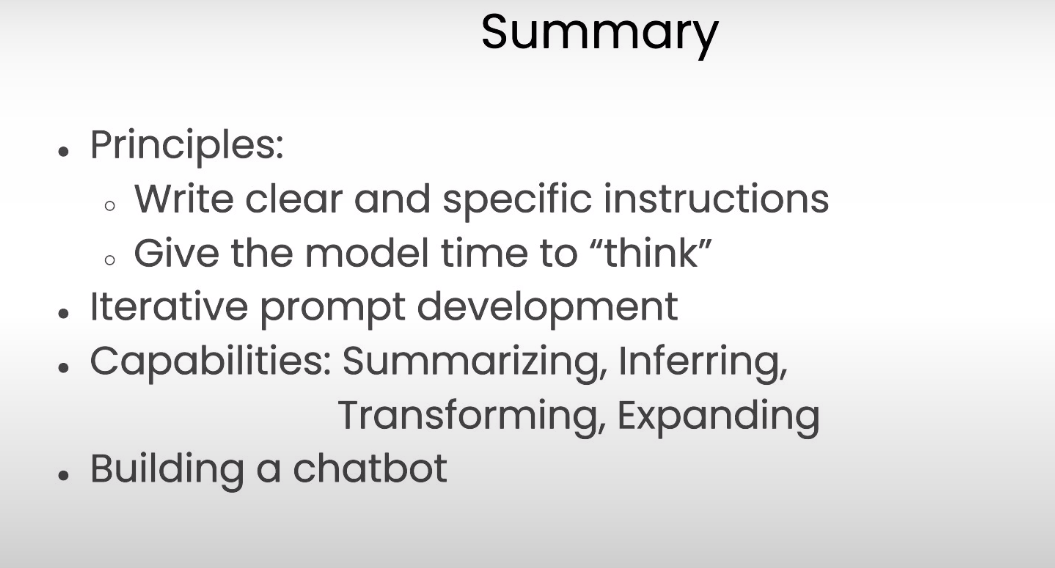